In [1]:
#import packages
import matplotlib.pyplot as plt #library for plotting and visualisation
import numpy as np #library for handling ndarrays
import scipy.io.wavfile as sp # libraray to write and read .wav files
import sounddevice as sd #library to play and record .wav files

In [2]:
#define a Function that plots a signal in time-domain
def plot_time_domain(signal,start=0,end=10,ylabel="Array values",title="Graph of the signal",digital=False):
    N=signal.size
    t=np.linspace(start,end,N)
    if digital:
        plt.scatter(t,signal,marker='o')
    else:
        plt.plot(t,signal)
    plt.xlabel(f"time(s)")
    plt.title(title)
    plt.ylabel(ylabel)
    None

In [42]:
#define a function that plots a signal in frequency domain with frequency axis laballed in Hz
def plot_frequency_domain(signal,sampling_rate=100,title="Frequency plot of the signal", ylabel="magnitude"):
    N=signal.size
    Time_spacing=1/sampling_rate;
    freq_spacing=1/(N*Time_spacing)
    if N % 2 ==0:
        f_axis=np.arange((-N/2)*freq_spacing,((N/2)*freq_spacing,freq_spacing)
    else:
        f_axis=np.arange((-(N+1)/2)*freq_spacing,((N-1)/2)*(freq_spacing),freq_spacing)
    print(f"number of frequency samples:{f_axis.size}")
    plt.plot(f_axis,signal)
    plt.xlabel(f"frequency(Hz)")
    plt.title(title)
    plt.ylabel(ylabel)
    return None

SyntaxError: invalid syntax (3872501762.py, line 8)

In [43]:
#function that computer FFT of the signal and plots it in frequency domain labelled in Hz
def plot_fft(signal,sampling_rate,title="FFT of the signal", ylabel="FFT magnitude"):
    N=signal.size # size of the signal
    time_spacing=1/sampling_rate
    signal_fft=np.fft.fft(signal)#take frequency domain
    fft_shift=np.fft.fftshift(signal_fft)
    ft_mag=np.abs(fft_shift)*time_spacing
    plot_frequency_domain(ft_mag,sampling_rate,title,ylabel)
    return None
    

In [44]:
#function that reads and play the wave file (returns tha np array of data in the file and sampling rate 

def read_wav(filename,play=False):
    sampling_rate,data=sp.read(filename)
    if(play):
        sd.play(data,sampling_rate)
    return (sampling_rate,data)

In [45]:
#define a fucntion that computer gcc-phat and returns the cc array
def gcc_phat(signal1,signal2):

    #Add Zero padding in time domain to signals
    n=signal1.size+signal2.size
    SIGNAL1=np.fft.fft(signal1,n)
    SIGNAL2=np.fft.fft(signal2,n)
    Cross_Spectrum=SIGNAL1*np.conj(SIGNAL2)
    GCC_PHAT=Cross_Spectrum/np.abs(Cross_Spectrum)
    cc=np.fft.ifft(GCC_PHAT)
    return np.fft.fftshift(np.real(cc))

In [46]:
#define a fucntion that returns the time delay between the signals, given thier cross-correlation
def get_delay(corr,sampling_rate):
    N=corr.size
    time_spacing=1/sampling_rate
    maximum_shift_ind=(int)(N/2)
    shift_index=np.argmax(np.abs(corr))-maximum_shift_ind
    tau=(shift_index*time_spacing)
    return round(np.abs(tau),3)
    

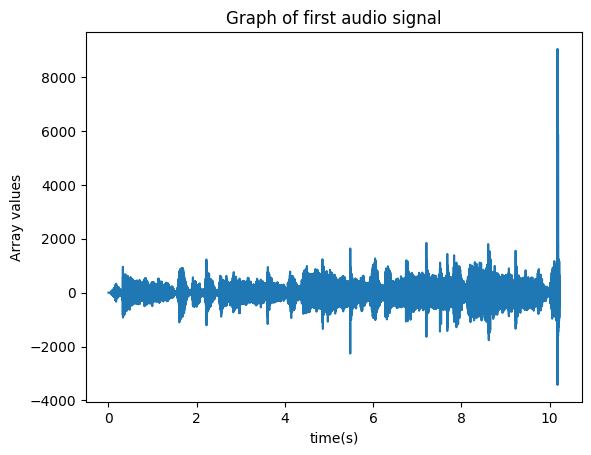

In [47]:
rate1,x2=read_wav("signal2.wav");
N=x2.size;
dt=1/rate1
t=np.linspace(0,N*dt,N)
plot_time_domain(x2,0,N*dt,title="Graph of first audio signal")

number of frequency samples:490495


ValueError: x and y must have same first dimension, but have shapes (490495,) and (490496,)

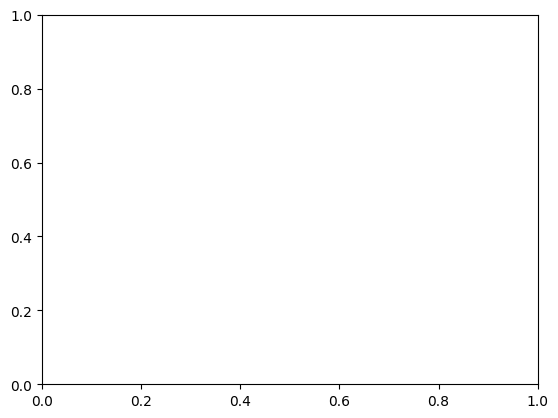

In [48]:
plot_fft(x2,rate1,title="FFT of the first audo signal");

In [ ]:
rate1,x1=read_wav("signal1.wav",True)
cc=gcc_phat(x1,x2)
delay=get_delay(cc,rate1)
print(f"Estimated delay is {delay} seconds")